In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [71]:
df = pd.read_csv("./1year_test_data.csv")

In [72]:
df.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,습도(%),...,이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,일조(hr),일조 QC플래그,3시간신적설(cm),전운량(10분위),시정(10m),지면온도(°C),지면온도 QC플래그
0,114,원주,2022-02-01 0:00,-0.2,NaN,0.0,NaN,0.7,NaN,74.0,...,-4.2,1003.9,NaN,NaN,9.0,NaN,9.0,493.0,-1.6,NaN
1,114,원주,2022-02-01 1:00,-1.9,NaN,NaN,9.0,0.3,NaN,85.0,...,-4.0,1004.0,NaN,NaN,9.0,NaN,9.0,202.0,-1.4,NaN
2,114,원주,2022-02-01 2:00,-1.7,NaN,NaN,9.0,0.7,NaN,87.0,...,-3.5,1004.0,NaN,NaN,9.0,NaN,9.0,477.0,-1.7,NaN
3,114,원주,2022-02-01 3:00,-0.4,NaN,0.0,NaN,0.4,NaN,86.0,...,-2.4,1003.8,NaN,NaN,9.0,NaN,9.0,602.0,-1.9,NaN
4,114,원주,2022-02-01 4:00,-0.8,NaN,NaN,9.0,0.7,NaN,82.0,...,-3.4,1003.1,NaN,NaN,9.0,NaN,9.0,764.0,-3.1,NaN


In [73]:
nan_counts = df.groupby('지점').apply(lambda x: x.isna().sum())
pd.DataFrame(nan_counts).to_csv("na.csv")

In [74]:
df.describe()

,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,습도(%),습도 QC플래그,이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,일조(hr),일조 QC플래그,3시간신적설(cm),전운량(10분위),시정(10m),지면온도(°C),지면온도 QC플래그
count,87600.00000,87583.000000,17.0,7610.000000,15519.0,87459.000000,106.0,87530.000000,70.0,87536.000000,87586.000000,14.0,47891.000000,39670.00000,186.000000,87411.000000,87202.000000,87583.000000,313.000000
mean,198.70000,13.234856,9.0,1.457753,9.0,1.521800,9.0,68.695166,9.0,6.782760,1006.184733,9.0,0.490593,8.99879,0.594086,5.165929,2383.667404,15.719229,0.488818
std,53.31081,11.047893,0.0,3.464392,0.0,1.245203,0.0,21.373931,0.0,12.069147,10.630441,0.0,0.444182,0.09838,1.047941,3.938472,1503.426741,12.704338,2.042976
min,114.00000,-19.100000,9.0,0.000000,9.0,0.000000,9.0,2.000000,9.0,-37.400000,964.200000,9.0,0.000000,1.00000,0.000000,0.000000,1.000000,-15.500000,0.000000
25%,146.00000,4.500000,9.0,0.000000,9.0,0.600000,9.0,54.000000,9.0,-2.400000,999.000000,9.0,0.000000,9.00000,0.000000,0.000000,1293.000000,4.800000,0.000000
50%,196.00000,14.500000,9.0,0.200000,9.0,1.200000,9.0,71.000000,9.0,7.300000,1006.500000,9.0,0.500000,9.00000,0.200000,6.000000,2000.000000,16.000000,0.000000
75%,251.00000,22.700000,9.0,1.300000,9.0,2.200000,9.0,87.000000,9.0,17.100000,1014.200000,9.0,1.000000,9.00000,0.600000,9.000000,3547.000000,25.300000,0.000000
max,276.00000,36.500000,9.0,53.800000,9.0,12.600000,9.0,100.000000,9.0,28.300000,1032.200000,9.0,1.000000,9.00000,7.700000,10.000000,5000.000000,62.500000,9.000000


In [75]:
df['일시'] = pd.to_datetime(df['일시'])

In [76]:
df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',
       '풍속(m/s)', '풍속 QC플래그', '습도(%)', '습도 QC플래그', '이슬점온도(°C)', '현지기압(hPa)',
       '현지기압 QC플래그', '일조(hr)', '일조 QC플래그', '3시간신적설(cm)', '전운량(10분위)',
       '시정(10m)', '지면온도(°C)', '지면온도 QC플래그'],
      dtype='object')

In [77]:
df.columns[[0,1,2,3,5,7,9,11,12,14,16,17,18,19]]

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

# 기온

In [78]:
df_temp = df[['일시', '기온(°C)', '기온 QC플래그']].copy()
df_temp.loc[df_temp['기온 QC플래그'].isin([1, 9]), '기온(°C)'] = None

In [79]:
df_temp['일시'] = pd.to_datetime(df_temp['일시'])
df_temp.set_index('일시', inplace=True)

In [80]:
df_temp['기온(°C)'] = df_temp['기온(°C)'].interpolate(method='time', order=2)

In [81]:
x1 = df['일시']
y1 = df_temp['기온(°C)']

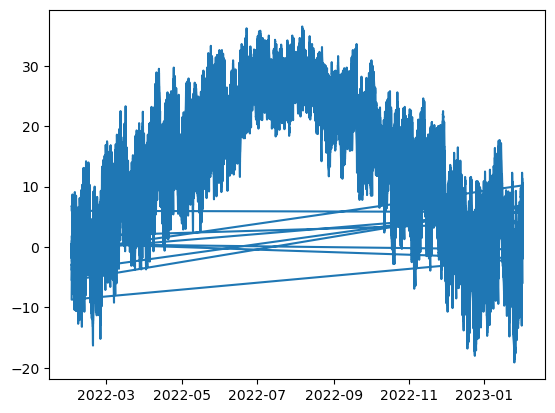

In [82]:
plt.plot(x1,y1)

In [83]:
df_temp = df_temp.reset_index()

In [84]:
df['기온(°C)'] = df_temp['기온(°C)']





# 강수량

In [85]:
df_rain = df[['일시', '강수량(mm)', '강수량 QC플래그']].copy()
df_rain.loc[df_rain['강수량 QC플래그'].isin([1, 9]), '강수량(mm)'] = None

In [86]:
# Assuming df is your DataFrame
df_rain['일시'] = pd.to_datetime(df_rain['일시'])
df_rain.set_index('일시', inplace=True)

# Interpolate the 'precipitation (mm)' column
df_rain['강수량(mm)'] = df_rain['강수량(mm)'].interpolate(method='time')

# Replace remaining NaN values with 0
df_rain['강수량(mm)'].fillna(0, inplace=True)

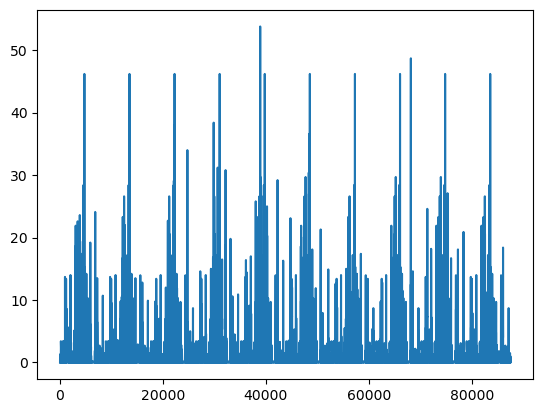

In [87]:
x2 = df.index
y2 = df_rain['강수량(mm)']
plt.plot(x2,y2)

In [88]:
df_rain = df_rain.reset_index()
df['강수량(mm)'] = df_rain['강수량(mm)']

# 풍속

In [89]:
df_wind = df[['일시', '풍속(m/s)', '풍속 QC플래그']].copy()
df_wind.loc[df_wind['풍속 QC플래그'].isin([1, 9]), '풍속(m/s)'] = None

df_wind['일시'] = pd.to_datetime(df_wind['일시'])
df_wind.set_index('일시', inplace=True)

In [90]:
df_wind['풍속(m/s)'] = df_wind['풍속(m/s)'].interpolate(method='time', order=3)

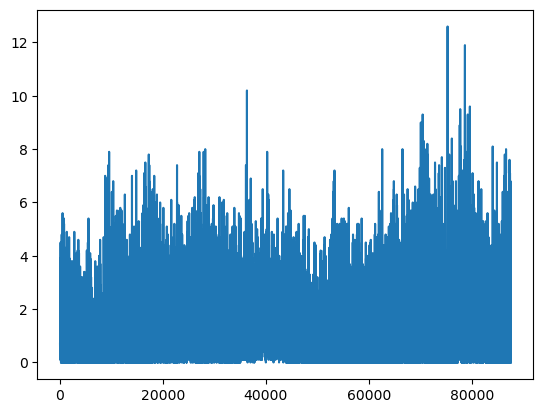

In [91]:
x2 = df.index
y2 = df_wind['풍속(m/s)']
plt.plot(x2,y2)

In [92]:
df_wind = df_wind.reset_index()
df['풍속(m/s)'] = df_wind['풍속(m/s)']

# 습도

In [93]:
df_humidity = df[['일시', '습도(%)', '습도 QC플래그']].copy()
df_humidity.loc[df_humidity['습도 QC플래그'].isin([1, 9]), '습도(%)'] = None
df_humidity['일시'] = pd.to_datetime(df_humidity['일시'])
df_humidity.set_index('일시', inplace=True)

In [94]:
df_humidity['습도(%)'] = df_humidity['습도(%)'].interpolate(method='time', order=5)

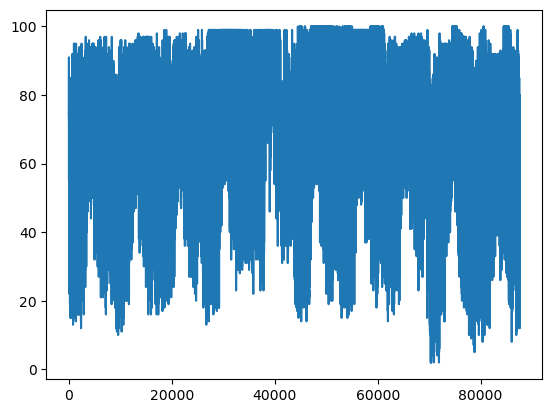

In [95]:
x2 = df.index
y2 = df_humidity['습도(%)']
plt.plot(x2,y2)

In [96]:
df_humidity = df_humidity.reset_index()
df['습도(%)'] = df_humidity['습도(%)']

# 이슬점 온도

In [97]:
df_dew = df[['일시', '이슬점온도(°C)']].copy()

In [98]:
# Assuming df is your DataFrame
df_dew['일시'] = pd.to_datetime(df_dew['일시'])
df_dew.set_index('일시', inplace=True)


df_dew['이슬점온도(°C)'] = df_dew['이슬점온도(°C)'].interpolate(method='time', order = 5)

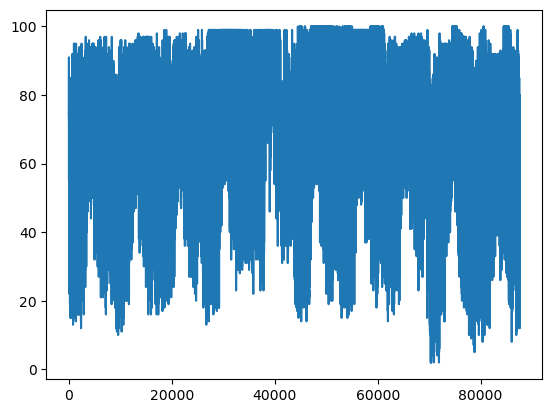

In [99]:
x = df.index
y = df_dew['이슬점온도(°C)']
plt.plot(x2,y2)

In [100]:
df_dew = df_dew.reset_index()
df['이슬점온도(°C)'] = df_dew['이슬점온도(°C)']

# 현지기압

In [101]:
df_airpress = df[['일시', '현지기압(hPa)', '현지기압 QC플래그']].copy()

In [102]:
df_airpress.loc[df_airpress['현지기압 QC플래그'].isin([1, 9]), '습도(%)'] = None


In [103]:
# Assuming df is your DataFrame
df_airpress['일시'] = pd.to_datetime(df_airpress['일시'])
df_airpress.set_index('일시', inplace=True)


df_airpress['현지기압(hPa)'] = df_airpress['현지기압(hPa)'].interpolate(method='time')

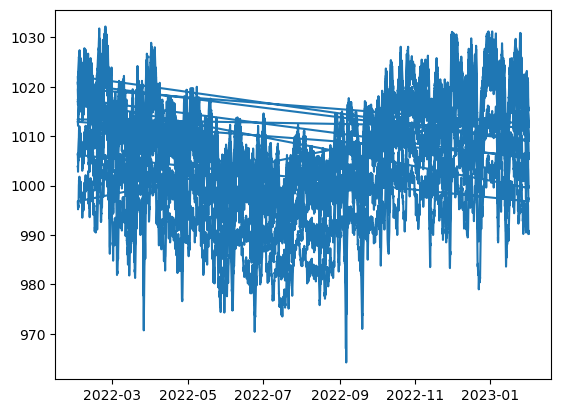

In [104]:
x = df_airpress.index
y = df_airpress['현지기압(hPa)']
plt.plot(x,y)

In [105]:
df_airpress = df_airpress.reset_index()
df['현지기압(hPa)'] = df_airpress['현지기압(hPa)']

# 일조

In [106]:
df.columns[[0,1,2,3,5,7,9,11,12,14,16,17,18,19]]

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

In [107]:
df_sun = df[['일시', '일조(hr)', '일조 QC플래그']].copy()

In [108]:
# First, make sure 'Date' is in datetime format
df_sun['일시'] = pd.to_datetime(df_sun['일시'])

# Set index to 'Date' for interpolation
df_sun.set_index('일시', inplace=True)

# Interpolate 'Day(hr)' values where 'Daylight QC Flag' equals 1
df_sun.loc[df_sun['일조 QC플래그'] == 1, '일조(hr)'] = df_sun.loc[df_sun['일조 QC플래그'] == 1, '일조(hr)'].interpolate(method='time')

# Reset index after interpolation
df_sun.reset_index(inplace=True)

# Change 'Day(hr)' to 0 where 'Daylight QC Flag' equals 9
df_sun.loc[df_sun['일조 QC플래그'] == 9 , '일조(hr)'] = 0

In [109]:
# First, make sure 'Date' is in datetime format
df_sun['일시'] = pd.to_datetime(df_sun['일시'])

# Set index to 'Date' for interpolation
df_sun.set_index('일시', inplace=True)

# Create mask for time range between 08:00 and 18:00
mask = (df_sun.index.time >= pd.to_datetime('08:00:00').time()) & (df_sun.index.time <= pd.to_datetime('18:00:00').time())

# Interpolate 'Day(hr)' values where time is between 08:00 and 18:00
df_sun.loc[mask, '일조(hr)'] = df_sun.loc[mask, '일조(hr)'].interpolate(method='time')

# Change 'Day(hr)' to 0 where time is outside 08:00 to 18:00
df_sun.loc[~mask, '일조(hr)'] = 0

# Reset index after operation
df_sun.reset_index(inplace=True)

In [110]:
# Ensure 'Date' is in datetime format
df_sun['일시'] = pd.to_datetime(df_sun['일시'])

# Create a new column 'Hour' based on the 'Date' column
df_sun['Hour'] = df_sun['일시'].dt.hour

# Create a mask for 'Day(hr)' values that are 0
mask = df_sun['일조(hr)'] == 0

# Count the number of 'Day(hr)' values that are 0 for each hour
zero_sun_counts = df_sun.loc[mask].groupby('Hour').size()

print(zero_sun_counts)

Hour
0     3650
1     3650
2     3650
3     3650
4     3650
5     3650
6     3650
7     3650
8     1990
9     1202
10     943
11     790
12     732
13     713
14     701
15     721
16     819
17    1000
18    1674
19    3650
20    3650
21    3650
22    3650
23    3650
dtype: int64


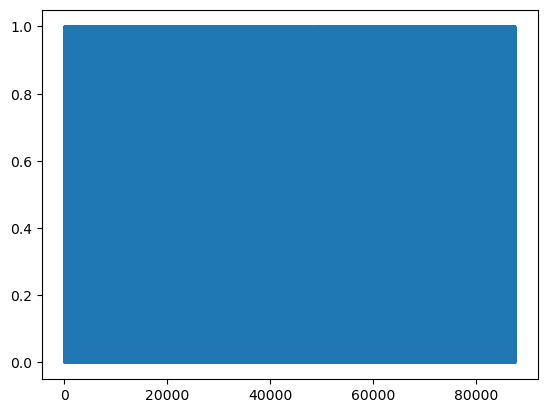

In [111]:
x = df_sun.index
y = df_sun['일조(hr)']
plt.plot(x,y)

In [112]:
df_sun = df_sun.reset_index()
df['일조(hr)'] = df_sun['일조(hr)']

# 3시간신적설

In [113]:
df.columns[[0,1,2,3,5,7,9,11,12,14,16,17,18,19]]

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

In [114]:
df_snow = df[['일시', '3시간신적설(cm)']].copy()

In [115]:
df_snow['3시간신적설(cm)'] = df_snow['3시간신적설(cm)'].fillna(0)

In [116]:
df_snow = df_snow.reset_index()

# Ensure 'Date' is in datetime format
df_snow['일시'] = pd.to_datetime(df_snow['일시'])


# Create a new column 'Hour' based on the 'Date' column
df_snow['Month'] = df_snow['일시'].dt.month

# Create a mask for 'Day(hr)' values that are 0
mask = df_snow['3시간신적설(cm)'] != 0

# Count the number of 'Day(hr)' values that are 0 for each hour
zero_sun_counts = df_snow.loc[mask].groupby('Month').size()

print(zero_sun_counts)

Month
1     21
2     22
11     1
12    81
dtype: int64


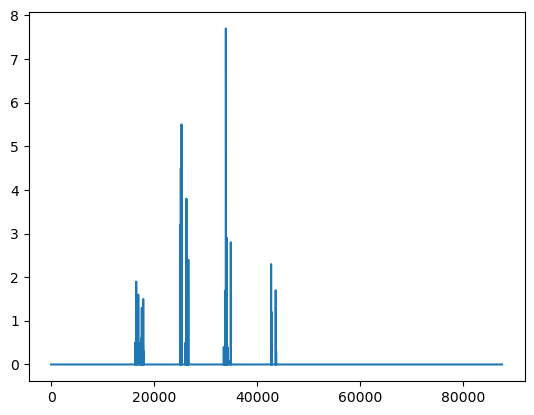

In [117]:
x = df.index
y = df_snow['3시간신적설(cm)']
plt.plot(x,y)

In [118]:
df_snow = df_snow.reset_index()
df['3시간신적설(cm)'] = df_snow['3시간신적설(cm)']

# 전운량

In [119]:
df.columns[[0,1,2,3,5,7,9,11,12,14,16,17,18,19]]

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

In [120]:
df_cloud = df[['일시', '지점', '전운량(10분위)']].copy()

In [121]:
from scipy import stats

In [122]:
# 일시를 datetime으로 변환
df_cloud['일시'] = pd.to_datetime(df_cloud['일시'])

# 지점과 일시로 정렬
df_cloud.sort_values(['지점', '일시'], inplace=True)

# 같은 지점의 전후 2시간 데이터의 최빈값으로 결측치 채우기
for i, row in df_cloud[df_cloud['전운량(10분위)'].isna()].iterrows():
    same_station = df_cloud[df_cloud['지점'] == row['지점']]
    two_hours_range = same_station[(same_station['일시'] >= row['일시'] - pd.Timedelta(hours=2)) & (same_station['일시'] <= row['일시'] + pd.Timedelta(hours=2))]
    if not two_hours_range['전운량(10분위)'].isna().all():  # 전후 2시간 동안의 데이터가 모두 결측치가 아니라면
        mode = stats.mode(two_hours_range['전운량(10분위)'].dropna())[0][0]
        df_cloud.loc[i, '전운량(10분위)'] = mode

# 같은 시간의 다른 지점들의 전운량의 평균값으로 결측치 채우기
for i, row in df_cloud[df_cloud['전운량(10분위)'].isna()].iterrows():
    same_time = df_cloud[df_cloud['일시'] == row['일시']]
    if not same_time['전운량(10분위)'].isna().all():  # 같은 시간의 다른 지점들의 데이터가 모두 결측치가 아니라면
        mean = same_time['전운량(10분위)'].mean()
        df_cloud.loc[i, '전운량(10분위)'] = mean

C:\Users\PC\AppData\Local\Temp\ipykernel_14904\3724579479.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(two_hours_range['전운량(10분위)'].dropna())[0][0]


In [123]:
df_cloud['전운량(10분위)'][df_cloud['전운량(10분위)'].isna()]

Series([], Name: 전운량(10분위), dtype: float64)

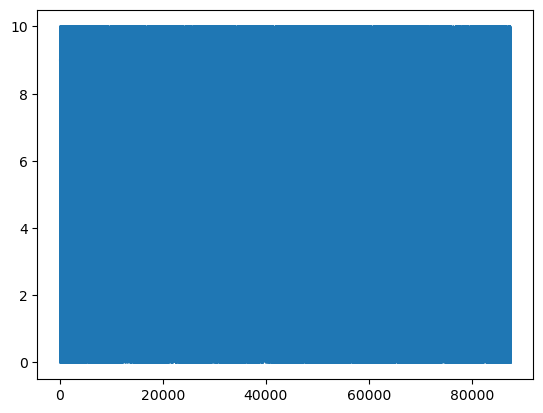

In [124]:
x = df.index
y = df_cloud['전운량(10분위)']
plt.plot(x,y)

In [125]:
df['전운량(10분위)'] = df_cloud['전운량(10분위)']

# 시정

In [126]:
df_sight = df[['일시', '지점', '시정(10m)']].copy()

In [127]:
# 일시를 datetime으로 변환
df_sight['일시'] = pd.to_datetime(df_sight['일시'])

# 지점과 일시로 정렬
df_sight.sort_values(['지점', '일시'], inplace=True)

# 같은 지점의 전후 2시간 데이터의 최빈값으로 결측치 채우기
for i, row in df_sight[df_sight['시정(10m)'].isna()].iterrows():
    same_station = df_sight[df_sight['지점'] == row['지점']]
    two_hours_range = same_station[(same_station['일시'] >= row['일시'] - pd.Timedelta(hours=2)) & (same_station['일시'] <= row['일시'] + pd.Timedelta(hours=2))]
    if not two_hours_range['시정(10m)'].isna().all():  # 전후 2시간 동안의 데이터가 모두 결측치가 아니라면
        mode = stats.mode(two_hours_range['시정(10m)'].dropna())[0][0]
        df_sight.loc[i,'시정(10m)'] = mode

# 같은 시간의 다른 지점들의 전운량의 평균값으로 결측치 채우기
for i, row in df_sight[df_sight['시정(10m)'].isna()].iterrows():
    same_time = df_sight[df_sight['일시'] == row['일시']]
    if not same_time['시정(10m)'].isna().all():  # 같은 시간의 다른 지점들의 데이터가 모두 결측치가 아니라면
        mean = same_time['시정(10m)'].mean()
        df_sight.loc[i, '시정(10m)'] = mean

C:\Users\PC\AppData\Local\Temp\ipykernel_14904\1041079955.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(two_hours_range['시정(10m)'].dropna())[0][0]


In [128]:
sum(df_sight['시정(10m)'].isnull())

0

In [129]:
df['시정(10m)'] = df_sight['시정(10m)']

# 지면 온도

In [130]:
df_ground = df[['일시', '지면온도(°C)', '지면온도 QC플래그']].copy()

# Assuming df is your DataFrame
df_ground['일시'] = pd.to_datetime(df_ground['일시'])
df_ground.set_index('일시', inplace=True)

df_ground['지면온도(°C)'] = df_ground['지면온도(°C)'].interpolate(method='time', order = 5)

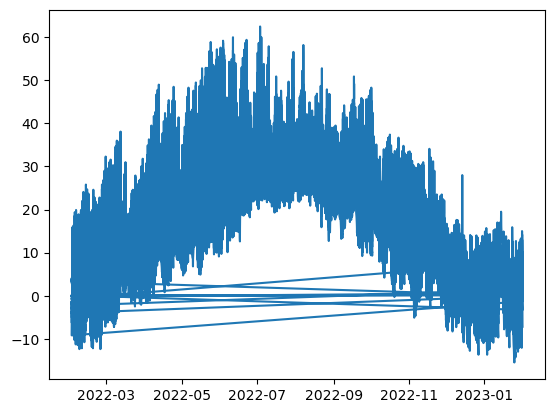

In [131]:
x = df_ground.index
y = df_ground['지면온도(°C)']
plt.plot(x,y)


In [132]:
df_ground = df_ground.reset_index()
df['지면온도(°C)'] = df_ground['지면온도(°C)']

In [133]:
df.columns[[0,1,2,3,5,7,9,11,12,14,16,17,18,19]]

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

In [134]:
data = df[['지점','일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)','현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)', '지면온도(°C)']]

In [135]:
cols = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)','현지기압(hPa)', '일조(hr)', '3시간신적설(cm)', '전운량(10분위)', '시정(10m)', '지면온도(°C)']

In [136]:
for col in cols:
    print(sum(data[col].isnull()))

0
0
0
0
0
0
0
0
0
0
0


In [137]:
data.to_csv("Test_data.csv")